## Cleaning Data

In [21]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df= pd.read_csv('../../Data/training.csv')
print ('shape of df :' ,  df.shape)


shape of df : (95662, 16)


In [23]:
# Drop the columns that are not needed (CurrencyCode, CountryCode) same value for all rows
df.drop(['CurrencyCode', 'CountryCode'], axis=1, inplace=True)

# drop the column 'TransactionId' because it is not needed each transaction has a unique Id
df.drop(['TransactionId'], axis=1, inplace=True)
print (df.head())
print ('\n ---------------- \n Shape \n',df.shape)

          BatchId       AccountId       SubscriptionId       CustomerId  \
0   BatchId_36123  AccountId_3957   SubscriptionId_887  CustomerId_4406   
1   BatchId_15642  AccountId_4841  SubscriptionId_3829  CustomerId_4406   
2   BatchId_53941  AccountId_4229   SubscriptionId_222  CustomerId_4683   
3  BatchId_102363   AccountId_648  SubscriptionId_2185   CustomerId_988   
4   BatchId_38780  AccountId_4841  SubscriptionId_3829   CustomerId_988   

     ProviderId     ProductId     ProductCategory    ChannelId   Amount  \
0  ProviderId_6  ProductId_10             airtime  ChannelId_3   1000.0   
1  ProviderId_4   ProductId_6  financial_services  ChannelId_2    -20.0   
2  ProviderId_6   ProductId_1             airtime  ChannelId_3    500.0   
3  ProviderId_1  ProductId_21        utility_bill  ChannelId_3  20000.0   
4  ProviderId_4   ProductId_6  financial_services  ChannelId_2   -644.0   

   Value  TransactionStartTime  PricingStrategy  FraudResult  
0   1000  2018-11-15T02:18:49Z     

In [24]:
# Split the string in the column 'AccountId' to get the number of the account
df['AccountId'] = df['AccountId'].str.split('_').str[1] # split the string and get the 1th element
# Split the string in the column to get the transaction Id, same for the column 'BatchId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'ChannelId'
df['BatchId'] = df['BatchId'].str.split('_').str[1] # split the string and get the 1th element
df['SubscriptionId'] = df['SubscriptionId'].str.split('_').str[1] 
df['CustomerId'] = df['CustomerId'].str.split('_').str[1] 
df['ProviderId'] = df['ProviderId'].str.split('_').str[1] 
df['ProductId'] = df['ProductId'].str.split('_').str[1] 
df['ChannelId'] = df['ChannelId'].str.split('_').str[1] 

print (df.head())
print ('\n ---------------- \n Shape \n',df.shape)


print ('df["ProductCategory"].unique()', df["ProductCategory"].unique())

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

      ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0             airtime         3   1000.0   1000  2018-11-15T02:18:49Z   
1  financial_services         2    -20.0     20  2018-11-15T02:19:08Z   
2             airtime         3    500.0    500  2018-11-15T02:44:21Z   
3        utility_bill         3  20000.0  21800  2018-11-15T03:32:55Z   
4  financial_services         2   -644.0    644  2018-11-15T03:34:21Z   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2                2            0  
3   

In [25]:
# Find the minimum and maximum date in the column 'TransactionStartTime'
print ('df["TransactionStartTime"].min()', df["TransactionStartTime"].min())
print ('df["TransactionStartTime"].max()', df["TransactionStartTime"].max())

df["TransactionStartTime"].min() 2018-11-15T02:18:49Z
df["TransactionStartTime"].max() 2019-02-13T10:01:28Z


In [26]:
# Normalize the column 'TransactionStartTime' to get the hour of the day
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime']) # convert to datetime
df['TransactionStartTime'] = df['TransactionStartTime'].dt.hour # get the hour of the day
print (df.head())
print ('\n ---------------- \n Shape \n',df.shape)

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

      ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0             airtime         3   1000.0   1000                     2   
1  financial_services         2    -20.0     20                     2   
2             airtime         3    500.0    500                     2   
3        utility_bill         3  20000.0  21800                     3   
4  financial_services         2   -644.0    644                     3   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2                2            0  
3   

In [27]:
# find the columns that have missing values
print ('df.isnull().sum()\n', df.isnull().sum())


df.isnull().sum()
 BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [28]:
# register in a new df for an Ordinal Encoding 
df_ord = df.copy()

# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()


df_ord["ProductCategory"] = ord_enc.fit_transform(df_ord[["ProductCategory"]])


print (df_ord.head())
print ('\n ---------------- \n Shape \n',df_ord.shape)

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

   ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0              0.0         3   1000.0   1000                     2   
1              2.0         2    -20.0     20                     2   
2              0.0         3    500.0    500                     2   
3              8.0         3  20000.0  21800                     3   
4              2.0         2   -644.0    644                     3   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2                2            0  
3                2    

In [29]:
# register in a new df for an One Hot Encoding
df_onehot = df.copy()

# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(sparse=False)

df_onehot["ProductCategory"] = onehot_enc.fit_transform(df_onehot[["ProductCategory"]])


print (df_onehot.head())

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

   ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0              1.0         3   1000.0   1000                     2   
1              0.0         2    -20.0     20                     2   
2              1.0         3    500.0    500                     2   
3              0.0         3  20000.0  21800                     3   
4              0.0         2   -644.0    644                     3   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2                2            0  
3                2    

In [30]:
df_ord_diff_values_amount = df_ord.copy()

# Create a new column with the difference between the amount and the value
df_ord_diff_values_amount['(Amount-Value)'] = df_ord_diff_values_amount['Amount'] - df_ord_diff_values_amount['Value']
# Force object values to be numeric
df_ord_diff_values_amount = df_ord_diff_values_amount.apply(pd.to_numeric, errors='coerce') # coerce -> invalid parsing will be set as NaN


In [31]:
#print ("\n ---------------------  \n Before changing object to num", df_ord.info())
# Force object values to be numeric
df_ord = df_ord.apply(pd.to_numeric, errors='coerce') # coerce -> invalid parsing will be set as NaN

print ("\n ---------------------  \n After changing object to num", df_ord.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BatchId               95662 non-null  int64  
 1   AccountId             95662 non-null  int64  
 2   SubscriptionId        95662 non-null  int64  
 3   CustomerId            95662 non-null  int64  
 4   ProviderId            95662 non-null  int64  
 5   ProductId             95662 non-null  int64  
 6   ProductCategory       95662 non-null  float64
 7   ChannelId             95662 non-null  int64  
 8   Amount                95662 non-null  float64
 9   Value                 95662 non-null  int64  
 10  TransactionStartTime  95662 non-null  int64  
 11  PricingStrategy       95662 non-null  int64  
 12  FraudResult           95662 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 9.5 MB

 ---------------------  
 After changing object to num None


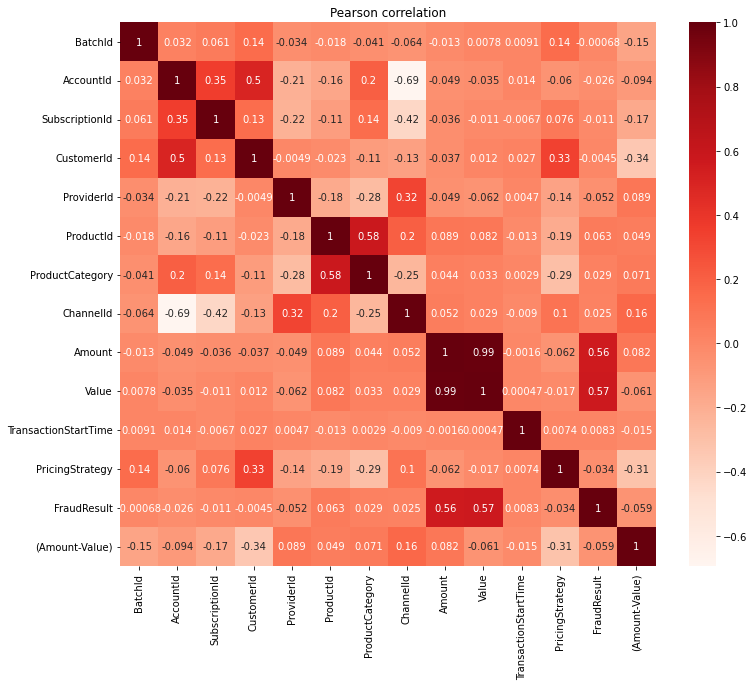

<Figure size 432x288 with 0 Axes>

In [32]:


# Find the correlation between features and the target variable Class using Pearson correlation method
plt.figure(figsize=(12,10))
cor = df_ord_diff_values_amount.corr('pearson')
import seaborn as sns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Pearson correlation')
plt.show()
# Save plots as png
plt.savefig('../Report/images/correlation-pearson.png')

# Find the correlation between features and the target variable Class using Spearman correlation method
# plt.figure(figsize=(12,10))
# cor = df_ord_diff_values_amount.corr(method='spearman')
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.title('Spearman correlation')
# plt.show()

# Save plots as png
#plt.savefig('../../Data/correlation-spearman.png')





In [37]:
# from scipy import stats

# # Normalize the data
# from sklearn.preprocessing import MinMaxScaler
# normalized_data = stats.boxcox(df_ord_diff_values_amount)


# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_ord_diff_values_amount = scaler.fit_transform(df_ord_diff_values_amount)


array([[-0.84766429,  0.38167703, -1.65082803, ..., -0.34925239,
        -0.04496219,  0.17989479],
       [-1.3522959 ,  0.94833211,  0.6228015 , ..., -0.34925239,
        -0.04496219,  0.17763391],
       [-0.40864637,  0.55603244, -2.16475176, ..., -0.34925239,
        -0.04496219,  0.17989479],
       ...,
       [ 1.18453679,  0.94833211,  0.6228015 , ..., -0.34925239,
        -0.04496219,  0.17763391],
       [ 0.00979797, -1.29200668, -1.83244017, ..., -0.34925239,
        -0.04496219,  0.17989479],
       [-1.01535741,  0.94833211,  0.6228015 , ..., -0.34925239,
        -0.04496219,  0.17311215]])

Explained variance ratio: [0.20187402 0.17450462]


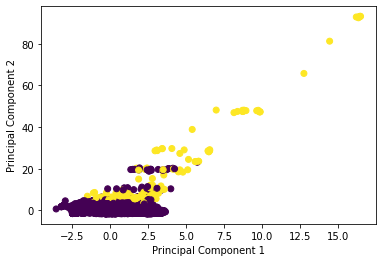

In [33]:

# let's have PCA study on df_ord to describe the data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
X = StandardScaler().fit_transform(df_ord.drop(['FraudResult'], axis=1))
y = df_ord['FraudResult']

# PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
# = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3',])
#print (principalDf.head())

print('Explained variance ratio:', pca.explained_variance_ratio_)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1] , c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [34]:
# Save df_ord in a csv file
df_ord.to_csv('../../Data/cleaned_data.csv', index=False)
